<a href="https://colab.research.google.com/github/sangeetha62/NLP/blob/main/NLP_topic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# here there is a supervised data, twitter file===> 
## importing libraries

In [ ]:
import re     
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
df=pd.read_csv("/content/twitter_validation.csv",encoding="ISO-8859-1",header=None)    
df.columns=['Id','location','target','text']
df

,Id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,Id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,Id,location,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.shape

(1000, 4)

In [ ]:
df['location'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


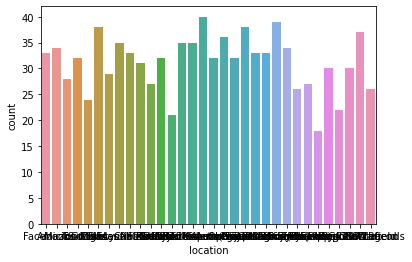

In [ ]:
## Data visualization
sns.countplot(df['location'])

In [ ]:
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


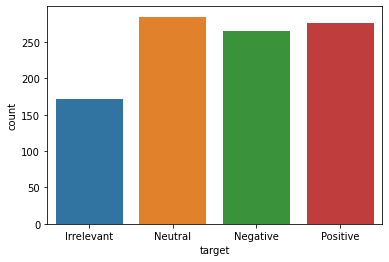

In [ ]:
sns.countplot(df['target'])

In [ ]:
# to find the missing values
df.isna().sum()

Id          0
location    0
target      0
text        0
dtype: int64

In [ ]:
## droping Irrelevent from the column target
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,Id,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.tail()  # here we understood that index has been changed as the rows are deleted. so resetting the index

,Id,location,target,text
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
## reset index
df.reset_index(drop=True,inplace=True)
df

,Id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# drop unwanted columns Id,location
df.drop(['Id','location'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
## assigning value 1 for positive -1 for negative 0 for neutral
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punk')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading punk: Package 'punk' not found in index


False

In [ ]:
# assigning  the text colmn to a variable.. called tweets
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
# tokenization
from nltk.draw.util import Tk
## tokenisation of tweets.
from nltk import TweetTokenizer  ## there are different tokenisers and we can choose any.
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))    ## first lambda is to tokenise each sentence in the column .. next one is to print all 
## tokens to join in a single line by joining with space. so that all tokens will be print in a sentence manner.
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
# to remove the special characters from the tokens using regular expression (re)
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')    ## ^ symbol is using here to replace the values except the values comes along with cap (^) symbol 
# (ie, a to z A to Z and 0to 9 are preserved and except this, all others have been deleted) + sign is provided to eliminate all combinations of special characters(###,@@@).. 
## if we provide without cap then the string  will replace all the values mentioned above and gives only the letters by removing those values.

tweets

<ipython-input-18-bbfe238deb81>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')    ## ^ symbol is using here to replace the values except the values comes along with cap (^) symbol


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
# collecting a meaningful word that would be mostly the character length above 3, 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [ ]:
 ## stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [ ]:
## to remove stopwords.
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [ ]:
##  vectorisation     tokens are converted to numericals
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_data=vect.fit_transform(tweets)

In [ ]:
print(train_data)   ## 828 rows and 3783 unique values.

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [ ]:
train_data.shape

(828, 3783)

In [ ]:
####  applying SUpervised machine learning####

In [ ]:
## now we have 2 datasets ip data is train data and o/p data is target column.
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train   ## (as it is a big data set )

<579x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 7250 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1,  0,  1, -1, -1, -1, -1, -1,  1, -1, -1,
        1, -1,  0, -1, -1, -1, -1, -1,  0,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  0, -1,  0, -1, -1,  0,  1, -1, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,
       -1,  0,  1,  0, -1, -1,  1, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1,
        0,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  1, -1,  0,  0,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  1,  0, -1,  0, -1, -1, -1, -1,  1,  0,  0, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1,  1,  1,
       -1, -1,  1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1,
       -1, -1, -1,  0,  1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.81      0.39      0.53       163
           0       0.29      0.48      0.36        48
           1       0.27      0.66      0.39        38

    accuracy                           0.45       249
   macro avg       0.46      0.51      0.43       249
weighted avg       0.63      0.45      0.48       249



In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-1,  0,  1,  0, -1, -1, -1,  0, -1,  0,  0, -1,  0,  1, -1, -1, -1,
        0, -1, -1,  0,  0,  0,  1,  0,  1,  1, -1, -1,  0,  0,  1, -1,  1,
        1, -1,  0, -1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  1,  0,  0,  0,
       -1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0, -1, -1, -1,  0,
        1,  0,  1,  0,  1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  1, -1,  0,  0,  0,  1,  1,  0, -1,  0,  1, -1,  0,  0, -1,
        0,  0,  0,  1,  0,  1,  1, -1, -1,  0, -1,  1,  0,  1,  0,  1,  1,
        0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,
       -1, -1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1, -1,  1,  0, -1,  1,  0,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  1,  1, -1, -1,  0,  0, -1, -1,  1,  0,  1,  1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  1,  0, -1,  0, -1,  0,  0,
        0, -1, -1,  0,  0

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.52      0.67      0.59        61
           0       0.76      0.46      0.57       130
           1       0.48      0.76      0.59        58

    accuracy                           0.58       249
   macro avg       0.59      0.63      0.58       249
weighted avg       0.64      0.58      0.58       249



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([ 1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1,
        0, -1,  1, -1,  0,  0,  1,  0,  1,  1, -1, -1,  1,  0,  1, -1,  1,
        1, -1,  0, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  1,  0,  1,  0,
       -1,  1,  1,  0,  0,  1,  1, -1,  0, -1,  1,  1, -1, -1,  1, -1,  0,
        1,  0,  1,  0,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  1, -1,
        1,  0,  1, -1,  1,  0,  0,  1,  1,  0,  1,  0,  1, -1,  0, -1, -1,
        0,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  1,  1, -1,  0,  1,
       -1, -1,  0,  1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,
       -1,  1,  0,  0,  0, -1, -1,  1,  0, -1,  1,  1,  0,  0, -1,  0,  1,
        1,  0,  0,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  0,  1,  1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  1, -1, -1,  0, -1,  0, -1,
        0, -1, -1,  1,  1

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.54      0.60      0.57        72
           0       0.54      0.47      0.50        92
           1       0.59      0.64      0.61        85

    accuracy                           0.56       249
   macro avg       0.56      0.57      0.56       249
weighted avg       0.56      0.56      0.56       249



In [ ]:
from  sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-1,  0,  1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  1, -1, -1, -1,
       -1, -1,  0, -1,  0,  0,  1,  0,  1,  1, -1, -1,  1,  0, -1, -1,  1,
        1, -1, -1, -1, -1,  1,  1,  0,  0,  1,  0,  1,  0,  0, -1,  1,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  1,  1, -1,  0,  1,  0,  0,  0,
       -1, -1,  1,  0, -1,  1,  1, -1, -1,  0, -1,  1, -1, -1, -1,  0,  0,
       -1,  0,  1, -1,  1, -1,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  1,
        1, -1,  1, -1,  0, -1,  0,  1,  0,  0, -1,  0,  1, -1, -1,  1, -1,
       -1,  0,  0,  1, -1, -1,  0, -1, -1,  0,  0,  1, -1, -1,  0,  1,  1,
        1,  1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  1, -1,  0,  0,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1, -1,  1, -1, -1,  1,  0,  0,  0, -1,  1,  0,
       -1, -1,  0,  0, -1,  1,  1, -1,  1,  1,  0, -1, -1,  1, -1,  1,  1,
       -1, -1,  0,  0,  1, -1,  0, -1,  0,  0,  1, -1, -1,  0,  1,  0, -1,
       -1, -1, -1,  0,  1

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.70      0.51      0.59       108
           0       0.56      0.53      0.54        83
           1       0.45      0.71      0.55        58

    accuracy                           0.56       249
   macro avg       0.57      0.58      0.56       249
weighted avg       0.59      0.56      0.56       249



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-1,  0,  1, -1,  0, -1, -1, -1,  1, -1, -1, -1,  0,  1,  0, -1, -1,
       -1, -1, -1,  1,  0,  0, -1,  0,  1,  1, -1,  1,  1,  0, -1, -1,  0,
        1, -1,  1,  1, -1,  1,  1,  0,  0, -1,  0,  1,  1,  0, -1, -1,  0,
       -1, -1, -1,  0,  0,  1,  0, -1, -1,  1,  0, -1,  0,  0,  0,  1,  1,
       -1,  0,  1,  0, -1, -1,  1, -1,  0, -1,  1,  1,  0,  1, -1,  0,  0,
        1,  0,  1, -1,  1,  1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,  1,
       -1,  1,  0, -1,  0, -1,  0, -1, -1,  0,  1,  0,  1,  1, -1,  1, -1,
       -1, -1,  0, -1, -1, -1,  1, -1, -1,  0,  0,  1, -1, -1,  0, -1,  0,
       -1,  1, -1,  1, -1,  0,  0, -1,  0,  1, -1, -1, -1, -1, -1,  1,  0,
       -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  0,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  1,  1, -1, -1,  1,  1,  0, -1,  0,  1,  1, -1, -1,  0,
        1,  1,  0,  0,  0,  0,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1,  0, -1,  1, -1,  0, -1,  0,  0,  1, -1, -1, -1,  1,  0, -1,
       -1, -1,  0,  0,  1

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.61      0.47      0.53       102
           0       0.42      0.43      0.42        77
           1       0.41      0.53      0.46        70

    accuracy                           0.47       249
   macro avg       0.48      0.48      0.47       249
weighted avg       0.49      0.47      0.48       249

